## Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.exceptions import UndefinedMetricWarning
from  sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB,ComplementNB,BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

## Function conf_matrix
* To preview the confusion matrix and classification report

In [2]:
def conf_matrix(x, y, title, show_report=False):
    cm = confusion_matrix(x, y)
    plt.figure(figsize=(6, 4))
    
    sns.heatmap(cm, annot=True, fmt='d', cmap="Oranges", cbar=False)
    plt.title(f'Confusion Matrix - {title} Data')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.show()
    if not show_report:
        print("Accuracy: ", accuracy_score(x, y))

    if show_report:
        report = classification_report(x, y)
        print("Classification Report:")
        print(report)
        plt.show()


## Read Date from URL 

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'


spambase = pd.read_csv(url, header=None)


In [4]:
spambase.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
spambase.shape

(4601, 58)

In [6]:
spambase[57].value_counts()

0    2788
1    1813
Name: 57, dtype: int64

#  Part 2 (A)

##  Split the dataset into two parts as training data and test data 

* first 80 percent for training
* last 20 percent for test

In [7]:
split_index = int(len(spambase) * 0.8)
first_80_percent= spambase[:split_index]
last_20_percent= spambase[split_index:]

##  split first_80_percent for x_train and y_train 
##  split last_20_percen for x_test and y_test 

In [8]:
x_train = first_80_percent.drop(first_80_percent.columns[-1], axis=1)
y_train = first_80_percent.iloc[:, -1]
x_test = last_20_percent.drop(first_80_percent.columns[-1], axis=1)
y_test = last_20_percent.iloc[:, -1]


## Function "Naive_Bayes_Models"

* this is user defined function whice apply Naive Bayes models 

* It Takes 4 parameters  Naive_Bayes_classifier , X__train , Y__train , X__test

* then path X__train and Y__train to fit function then path X__test to predict functoin to calculate classifier_predictions



In [9]:
def Naive_Bayes_Models(classifier,X__train,Y__train,X__test):
    classifier.fit(X__train, Y__train)
    classifier_predictions = classifier.predict(X__test)
    return classifier_predictions
    

## Run "Naive_Bayes_Models"  Function using GaussianNB classifier

In [10]:
Gaussian_predictions=Naive_Bayes_Models(GaussianNB(),x_train,y_train,x_test)

## display the confusion matrix for GaussianNB classifier

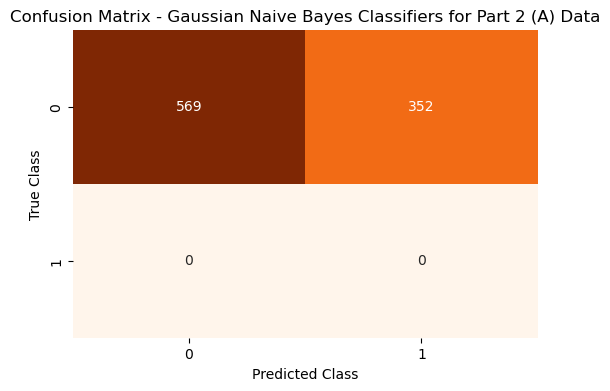

Accuracy:  0.6178067318132465


In [11]:
conf_matrix(y_test,Gaussian_predictions,"Gaussian Naive Bayes Classifiers for Part 2 (A)")



## Run "Naive_Bayes_Models"  Function using MultinomialNB classifier

In [12]:
MultinomialNB_predictions=Naive_Bayes_Models(MultinomialNB(),x_train,y_train,x_test)

## display the confusion matrix for MultinomialNB classifier

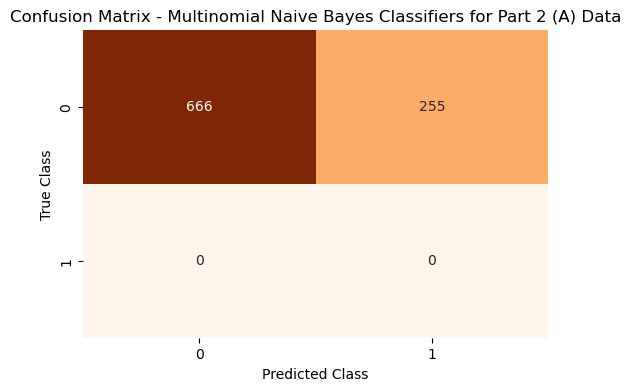

Accuracy:  0.7231270358306189


In [13]:
conf_matrix(y_test,MultinomialNB_predictions,"Multinomial Naive Bayes Classifiers for Part 2 (A)")

#   Part 2 (B)


## Put All columns except the last one  in X
## Put the last column in  Y

In [14]:
X = spambase.iloc[:, :-1]  # All columns except the last one
y = spambase.iloc[:, -1]


In [15]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

## Run "Naive_Bayes_Models"  Function using GaussianNB classifier 
* based on train test split function

In [16]:
Gaussian_Use_train_split_predictions=Naive_Bayes_Models(GaussianNB(),X_train_split,y_train_split,X_test_split)

##  display the confusion matrix for GaussianNB classifier

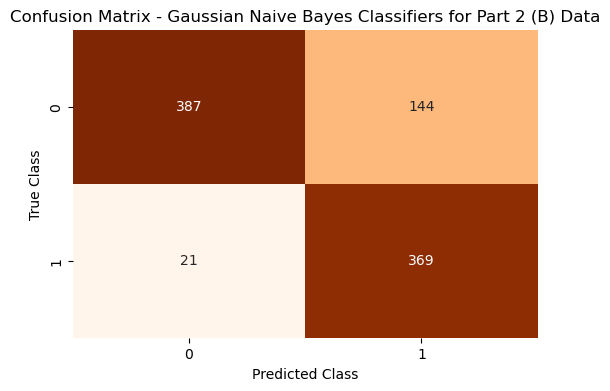

Accuracy:  0.8208469055374593


In [17]:
conf_matrix(y_test_split,Gaussian_Use_train_split_predictions,"Gaussian Naive Bayes Classifiers for Part 2 (B)")


## Run "Naive_Bayes_Models"  Function using MultinomialNB classifier 
* based on train test split function

In [18]:
MultinomialNB_Use_train_split_predictions=Naive_Bayes_Models(MultinomialNB(),X_train_split,y_train_split,X_test_split)

##  display the confusion matrix for MultinomialNB classifier

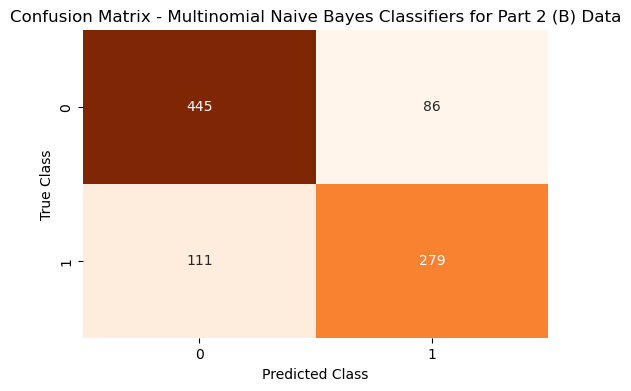

Accuracy:  0.7861020629750272


In [19]:
conf_matrix(y_test_split,MultinomialNB_Use_train_split_predictions,"Multinomial Naive Bayes Classifiers for Part 2 (B)")

#   Part 2 (C)


## Run "Naive_Bayes_Models"  Function using BernoulliNB classifier 
* based on train test split function

In [20]:
BernoulliNB_Use_train_split_predictions=Naive_Bayes_Models(BernoulliNB(),X_train_split,y_train_split,X_test_split)

##  display the confusion matrix for BernoulliNB classifier

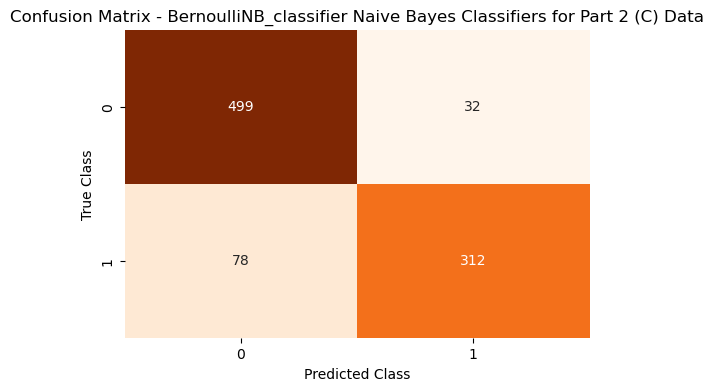

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       531
           1       0.91      0.80      0.85       390

    accuracy                           0.88       921
   macro avg       0.89      0.87      0.88       921
weighted avg       0.88      0.88      0.88       921



In [21]:
conf_matrix(y_test_split,BernoulliNB_Use_train_split_predictions,
            "BernoulliNB_classifier Naive Bayes Classifiers for Part 2 (C)",True)


In [22]:
print("Accuracy for BernoulliNB classifier : ", accuracy_score(y_test_split, BernoulliNB_Use_train_split_predictions))


Accuracy for BernoulliNB classifier :  0.8805646036916395


#    Part 2 (D)


## Split the first_80_percent  into o four equal parts (25%)

In [23]:
subset_1=first_80_percent[:int(len(first_80_percent)*0.25)]
subset_2=first_80_percent[int(len(first_80_percent)*0.25):int(len(first_80_percent)*0.50)]
subset_3=first_80_percent[int(len(first_80_percent)*0.50):int(len(first_80_percent)*0.75)]
subset_4=first_80_percent[int(len(first_80_percent)*0.75):]


## List of 4 subset

In [24]:
list_of_subset=[subset_1,subset_2,subset_3,subset_4]

## loop on list_of_subset to access each sub_set
* Put All columns except the last one  in x_train_sub_set
* Put the last column in  y_train_sub_set
* then Run "Naive_Bayes_Models" Function using BernoulliNB classifier for each sub_set
* predict the accuracy score by  last 20 percent 
* store the accuracy score for each sub_set in subset_accuracies list

In [25]:
subset_accuracies =[]
for iteration,sub_set in  enumerate(list_of_subset):


    x_train_sub_set = sub_set.drop(sub_set.columns[-1], axis=1)
    y_train_sub_set = sub_set.iloc[:, -1]

    
    subset_predictions=Naive_Bayes_Models(BernoulliNB(),x_train_sub_set,y_train_sub_set,x_test)    
    
    
    
    # Calculate the accuracy score for the subset
    
    subset_accuracy = accuracy_score(y_test, subset_predictions)
    print(f"Accuracy for subset  {iteration+1} using BernoulliNB classifier : ",subset_accuracy)
    # Store the accuracy score in the List

    subset_accuracies.append(subset_accuracy)


Accuracy for subset  1 using BernoulliNB classifier :  0.0
Accuracy for subset  2 using BernoulliNB classifier :  0.6438653637350705
Accuracy for subset  3 using BernoulliNB classifier :  1.0
Accuracy for subset  4 using BernoulliNB classifier :  1.0


##  Draw the bar chart to visualize the accuracy scores of the subsets

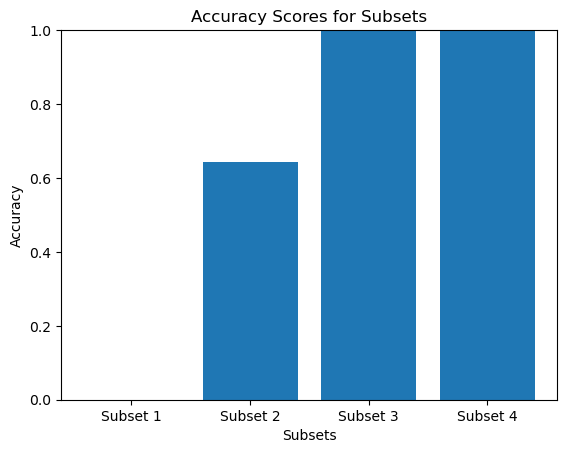

In [26]:

subset_labels = ['Subset 1', 'Subset 2', 'Subset 3', 'Subset 4']
plt.bar(subset_labels, subset_accuracies)
plt.xlabel('Subsets')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Subsets')
plt.ylim([0, 1])
plt.show()


In [27]:
for index,sub_set in  enumerate(list_of_subset):
    
    print("\t\t\t\t Subset :",index+1,"\n")   
    print("\t\t\t **** Training Data ****")
    
    print("______________________________________________________________________________")
    print(f"shape for subset {index+1} \n ",sub_set.shape)
    print("______________________________________________________________________________")
   
    print("value counts for Lable column in Training Data\n",sub_set[57].value_counts())
    print("______________________________________________________________________________")

    print("\n\t\t\t **** Test Data ****\n")
    
    print("value counts for Lable column in Test Data\n",last_20_percent[57].value_counts())
    print("_________________________________________________________________________\n\n")
    
    
    

				 Subset : 1 

			 **** Training Data ****
______________________________________________________________________________
shape for subset 1 
  (920, 58)
______________________________________________________________________________
value counts for Lable column in Training Data
 1    920
Name: 57, dtype: int64
______________________________________________________________________________

			 **** Test Data ****

value counts for Lable column in Test Data
 0    921
Name: 57, dtype: int64
_________________________________________________________________________


				 Subset : 2 

			 **** Training Data ****
______________________________________________________________________________
shape for subset 2 
  (920, 58)
______________________________________________________________________________
value counts for Lable column in Training Data
 1    893
0     27
Name: 57, dtype: int64
______________________________________________________________________________

			 **** Test Data ***